In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
from modules.data.load_output import load_output

path = "outputs/"
algo_names = ["1nn", "cart", "mlp", "random_forest"]
arit, esc, leit = load_output(path, algo_names)

Full 1nn:  outputs\full_arit_1nn_results.json
Reduced 1nn:  outputs\reduced_arit_1nn_results.json
Resampled 1nn:  outputs\resampled_arit_1nn_results.json
Improved 1nn:  outputs\improved_arit_1nn_results.json
Full cart:  outputs\full_arit_cart_results.json
Reduced cart:  outputs\reduced_arit_cart_results.json
Resampled cart:  outputs\resampled_arit_cart_results.json
Improved cart:  outputs\improved_arit_cart_results.json
Full mlp:  outputs\full_arit_mlp_results.json
Reduced mlp:  outputs\reduced_arit_mlp_results.json
Resampled mlp:  outputs\resampled_arit_mlp_results.json
Improved mlp:  outputs\improved_arit_mlp_results.json
Full random_forest:  outputs\full_arit_random_forest_results.json
Reduced random_forest:  outputs\reduced_arit_random_forest_results.json
Resampled random_forest:  outputs\resampled_arit_random_forest_results.json
Improved random_forest:  outputs\improved_arit_random_forest_results.json
-----------------------
Full 1nn:  outputs\full_esc_1nn_results.json
Reduced 1nn

In [12]:
import pandas as pd
def get_mean_class_metric(result, score_name, label, metric):
    metrics = []
    counter = 0
    for key in result:
        if key.startswith('i'):
            x = result[key][score_name][label][metric]
            metrics.append(x)
            counter+=1
    
    return sum(metrics) / counter

def get_metric_per_classes(database, metric, test_type, valid_base=False):
    if valid_base:
        score_name = "valid_scores"
    else:
        score_name = "scores"
    
    superior_list = []
    inferior_list = []
    avg_list = []
    for algo_name in algo_names:
        # print(test_type)
        # print(algo_name)
        # print(score_name)
        # print('=========================================')
        superior = get_mean_class_metric(database[algo_name][test_type], score_name, "Superior", metric)
        # print('------------------------------------------')
        inferior = get_mean_class_metric(database[algo_name][test_type], score_name, "Inferior", metric)
        # print('------------------------------------------')
        avg = get_mean_class_metric(database[algo_name][test_type], score_name, "macro avg", metric)
        superior_list.append(superior)
        inferior_list.append(inferior)
        avg_list.append(avg)

    
    return superior_list, inferior_list, avg_list


def get_metric_df(database, metric, valid_base=False):
    full = get_metric_per_classes(database, metric, "full", valid_base=valid_base)
    reduced =  get_metric_per_classes(database, metric, "reduced", valid_base=valid_base)
    resampled = get_metric_per_classes(database, metric, "resampled", valid_base=valid_base)
    improved = get_metric_per_classes(database, metric, "improved", valid_base=valid_base)

    row_superior = []
    for i in range(len(algo_names)):
        row_superior += [full[0][i], reduced[0][i], resampled[0][i], improved[0][i]]

        
    row_inferior = []
    for i in range(len(algo_names)):
        row_inferior += [full[1][i], reduced[1][i], resampled[1][i], improved[1][i]]
        
    row_avg = []
    for i in range(len(algo_names)):
        row_avg += [full[2][i], reduced[2][i], resampled[2][i], improved[2][i]]

    rows = np.zeros((3,16))
    rows[0] = row_superior
    rows[1] = row_inferior
    rows[2] = row_avg

    columns = []
    for algo_name in algo_names:
        columns.append(algo_name)
        columns.append(algo_name + "/Ant-IS")
        columns.append(algo_name + "/SMOTE")
        columns.append(algo_name + "/Ant-IS+SMOTE")
        

    return pd.DataFrame(rows, columns=columns, index=["Superior", "Inferior", "Média"])
    

get_metric_df(leit, "precision", valid_base=False)

,1nn,1nn/Ant-IS,1nn/SMOTE,1nn/Ant-IS+SMOTE,cart,cart/Ant-IS,cart/SMOTE,cart/Ant-IS+SMOTE,mlp,mlp/Ant-IS,mlp/SMOTE,mlp/Ant-IS+SMOTE,random_forest,random_forest/Ant-IS,random_forest/SMOTE,random_forest/Ant-IS+SMOTE
Superior,0.344405,0.704190,0.255595,0.626131,0.596190,0.767714,0.429762,0.715079,0.800000,0.863333,0.411667,0.591116,0.716667,0.872333,0.482857,0.797095
Inferior,0.842764,0.930167,0.825891,0.926775,0.906355,0.939170,0.866079,0.931180,0.811933,0.858847,0.852802,0.897367,0.841544,0.910632,0.863783,0.930826
Média,0.593584,0.817179,0.540743,0.776453,0.751273,0.853442,0.647920,0.823130,0.805967,0.861090,0.632234,0.744242,0.779105,0.891483,0.673320,0.863960


## Getting Metrics Data

Create pandas dataframes with information of each test per metric and dataset (Test and Validation)

In [13]:
arit_test_precision_df = get_metric_df(arit, "precision")
arit_valid_precision_df = get_metric_df(arit, "precision", valid_base=True)
arit_test_recall_df = get_metric_df(arit, "recall")
arit_valid_recall_df = get_metric_df(arit, "recall", valid_base=True)
arit_test_fmeasure_df = get_metric_df(arit, "f1-score")
arit_valid_fmeasure_df = get_metric_df(arit, "f1-score", valid_base=True)

esc_test_precision_df = get_metric_df(esc, "precision")
esc_valid_precision_df = get_metric_df(esc, "precision", valid_base=True)
esc_test_recall_df = get_metric_df(esc, "recall")
esc_valid_recall_df = get_metric_df(esc, "recall", valid_base=True)
esc_test_fmeasure_df = get_metric_df(esc, "f1-score")
esc_valid_fmeasure_df = get_metric_df(esc, "f1-score", valid_base=True)

leit_test_precision_df = get_metric_df(leit, "precision")
leit_valid_precision_df = get_metric_df(leit, "precision", valid_base=True)
leit_test_recall_df = get_metric_df(leit, "recall")
leit_valid_recall_df = get_metric_df(leit, "recall", valid_base=True)
leit_test_fmeasure_df = get_metric_df(leit, "f1-score")
leit_valid_fmeasure_df = get_metric_df(leit, "f1-score", valid_base=True)

arit_test_fmeasure_df

,1nn,1nn/Ant-IS,1nn/SMOTE,1nn/Ant-IS+SMOTE,cart,cart/Ant-IS,cart/SMOTE,cart/Ant-IS+SMOTE,mlp,mlp/Ant-IS,mlp/SMOTE,mlp/Ant-IS+SMOTE,random_forest,random_forest/Ant-IS,random_forest/SMOTE,random_forest/Ant-IS+SMOTE
Superior,0.475829,0.755181,0.533190,0.731723,0.528652,0.774208,0.502982,0.765477,0.688586,0.596769,0.683442,0.758393,0.606515,0.810357,0.614343,0.833484
Inferior,0.793259,0.909231,0.778332,0.885427,0.820795,0.914646,0.801953,0.917059,0.906771,0.910238,0.886792,0.909678,0.890946,0.946038,0.897301,0.947956
Média,0.634544,0.832206,0.655761,0.808575,0.674724,0.844427,0.652467,0.841268,0.797678,0.753503,0.785117,0.834035,0.748730,0.878198,0.755822,0.890720


## Plots results

1. Setting helper functions to create plots
2. Creating customized plots

In [14]:
def get_bars_per_df(df, suffix_list):
    
    bars = {}
    for suffix in suffix_list:
        bars[suffix] = []
    
    for suffix in bars.keys():
        for prefix in algo_names:
            if suffix == "full": # special case to results of tests with orignal dataset
                full_sufix = ""
            else:
                full_sufix = "/" + suffix

            bars[suffix] += [ 
                round(df[prefix + full_sufix].loc["Superior"]*100, 2), 
                round(df[prefix + full_sufix].loc["Inferior"]*100, 2)
            ] 
    
    return bars

In [15]:
# Barss per valid and test dataset
method_labels = ['full', 'Ant-IS', 'SMOTE', 'Ant-IS+SMOTE']
bars_arit_test_precision = get_bars_per_df(arit_test_precision_df, method_labels)
bars_arit_valid_precision = get_bars_per_df(arit_valid_precision_df, method_labels)

bars_arit_test_recall = get_bars_per_df(arit_test_recall_df, method_labels)
bars_arit_valid_recall = get_bars_per_df(arit_valid_recall_df, method_labels)

bars_arit_test_fmeasure = get_bars_per_df(arit_test_fmeasure_df, method_labels)
bars_arit_valid_fmeasure = get_bars_per_df(arit_valid_fmeasure_df, method_labels)

bars_esc_test_precision = get_bars_per_df(esc_test_precision_df, method_labels)
bars_esc_valid_precision = get_bars_per_df(esc_valid_precision_df, method_labels)

bars_esc_test_recall = get_bars_per_df(esc_test_recall_df, method_labels)
bars_esc_valid_recall = get_bars_per_df(esc_valid_recall_df, method_labels)

bars_esc_test_fmeasure = get_bars_per_df(esc_test_fmeasure_df, method_labels)
bars_esc_valid_fmeasure = get_bars_per_df(esc_valid_fmeasure_df, method_labels)

bars_leit_test_precision = get_bars_per_df(leit_test_precision_df, method_labels)
bars_leit_valid_precision = get_bars_per_df(leit_valid_precision_df, method_labels)

bars_leit_test_recall = get_bars_per_df(leit_test_recall_df, method_labels)
bars_leit_valid_recall = get_bars_per_df(leit_valid_recall_df, method_labels)

bars_leit_test_fmeasure = get_bars_per_df(leit_test_fmeasure_df, method_labels)
bars_leit_valid_fmeasure = get_bars_per_df(leit_valid_fmeasure_df, method_labels)

print(arit_test_precision_df)
bars_arit_test_precision

               1nn  1nn/Ant-IS  1nn/SMOTE  1nn/Ant-IS+SMOTE      cart  \
Superior  0.481786    0.776599   0.462222          0.688689  0.544921   
Inferior  0.805610    0.912253   0.850678          0.927544  0.831260   
Média     0.643698    0.844426   0.656450          0.808117  0.688090   

          cart/Ant-IS  cart/SMOTE  cart/Ant-IS+SMOTE       mlp  mlp/Ant-IS  \
Superior     0.792194    0.495253           0.807448  0.813333    0.904488   
Inferior     0.924203    0.827453           0.916452  0.876300    0.869766   
Média        0.858199    0.661353           0.861950  0.844817    0.887127   

          mlp/SMOTE  mlp/Ant-IS+SMOTE  random_forest  random_forest/Ant-IS  \
Superior   0.715714          0.797829       0.801667              0.936595   
Inferior   0.884518          0.916173       0.841909              0.918912   
Média      0.800116          0.857001       0.821788              0.927754   

          random_forest/SMOTE  random_forest/Ant-IS+SMOTE  
Superior             

{'full': [48.18, 80.56, 54.49, 83.13, 81.33, 87.63, 80.17, 84.19],
 'Ant-IS': [77.66, 91.23, 79.22, 92.42, 90.45, 86.98, 93.66, 91.89],
 'SMOTE': [46.22, 85.07, 49.53, 82.75, 71.57, 88.45, 84.33, 84.78],
 'Ant-IS+SMOTE': [68.87, 92.75, 80.74, 91.65, 79.78, 91.62, 93.15, 92.53]}

In [16]:
method_labels = ['full', 'Ant-IS', 'SMOTE', 'Ant-IS+SMOTE']
use_validation_data = True

if use_validation_data:
    arit_precision_df = arit_valid_precision_df
    arit_recall_df = arit_valid_recall_df
    arit_fmeasure_df = arit_valid_fmeasure_df
    esc_precision_df = esc_valid_precision_df
    esc_recall_df = esc_valid_recall_df
    esc_fmeasure_df = esc_valid_fmeasure_df
    leit_precision_df = leit_valid_precision_df
    leit_recall_df = leit_valid_recall_df
    leit_fmeasure_df = leit_valid_fmeasure_df
else:
    arit_precision_df = arit_test_precision_df
    arit_recall_df = arit_test_recall_df
    arit_fmeasure_df = arit_test_fmeasure_df
    esc_precision_df = esc_test_precision_df
    esc_recall_df = esc_test_recall_df
    esc_fmeasure_df = esc_test_fmeasure_df
    leit_precision_df = leit_test_precision_df
    leit_recall_df = leit_test_recall_df
    leit_fmeasure_df = leit_test_fmeasure_df

bars_arit_precision = get_bars_per_df(arit_precision_df, method_labels)
bars_arit_recall = get_bars_per_df(arit_recall_df, method_labels)
bars_arit_fmeasure = get_bars_per_df(arit_fmeasure_df, method_labels)
bars_esc_precision = get_bars_per_df(esc_precision_df, method_labels)
bars_esc_recall = get_bars_per_df(esc_recall_df, method_labels)
bars_esc_fmeasure = get_bars_per_df(esc_fmeasure_df, method_labels)
bars_leit_precision = get_bars_per_df(leit_precision_df, method_labels)
bars_leit_recall = get_bars_per_df(leit_recall_df, method_labels)
bars_leit_fmeasure = get_bars_per_df(leit_fmeasure_df, method_labels)


bars_leit_fmeasure

{'full': [31.51, 85.56, 51.82, 88.05, 29.77, 88.38, 42.42, 90.18],
 'Ant-IS': [26.05, 84.86, 49.61, 85.74, 24.11, 86.92, 38.9, 89.6],
 'SMOTE': [26.05, 75.97, 46.35, 80.76, 45.04, 78.13, 46.19, 83.44],
 'Ant-IS+SMOTE': [31.74, 79.25, 44.27, 80.04, 39.29, 73.78, 44.79, 83.52]}

(<Figure size 2160x2160 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Precesion'}>,
        <AxesSubplot:title={'center':'Recall'}>,
        <AxesSubplot:title={'center':'F-Measure'}>], dtype=object))

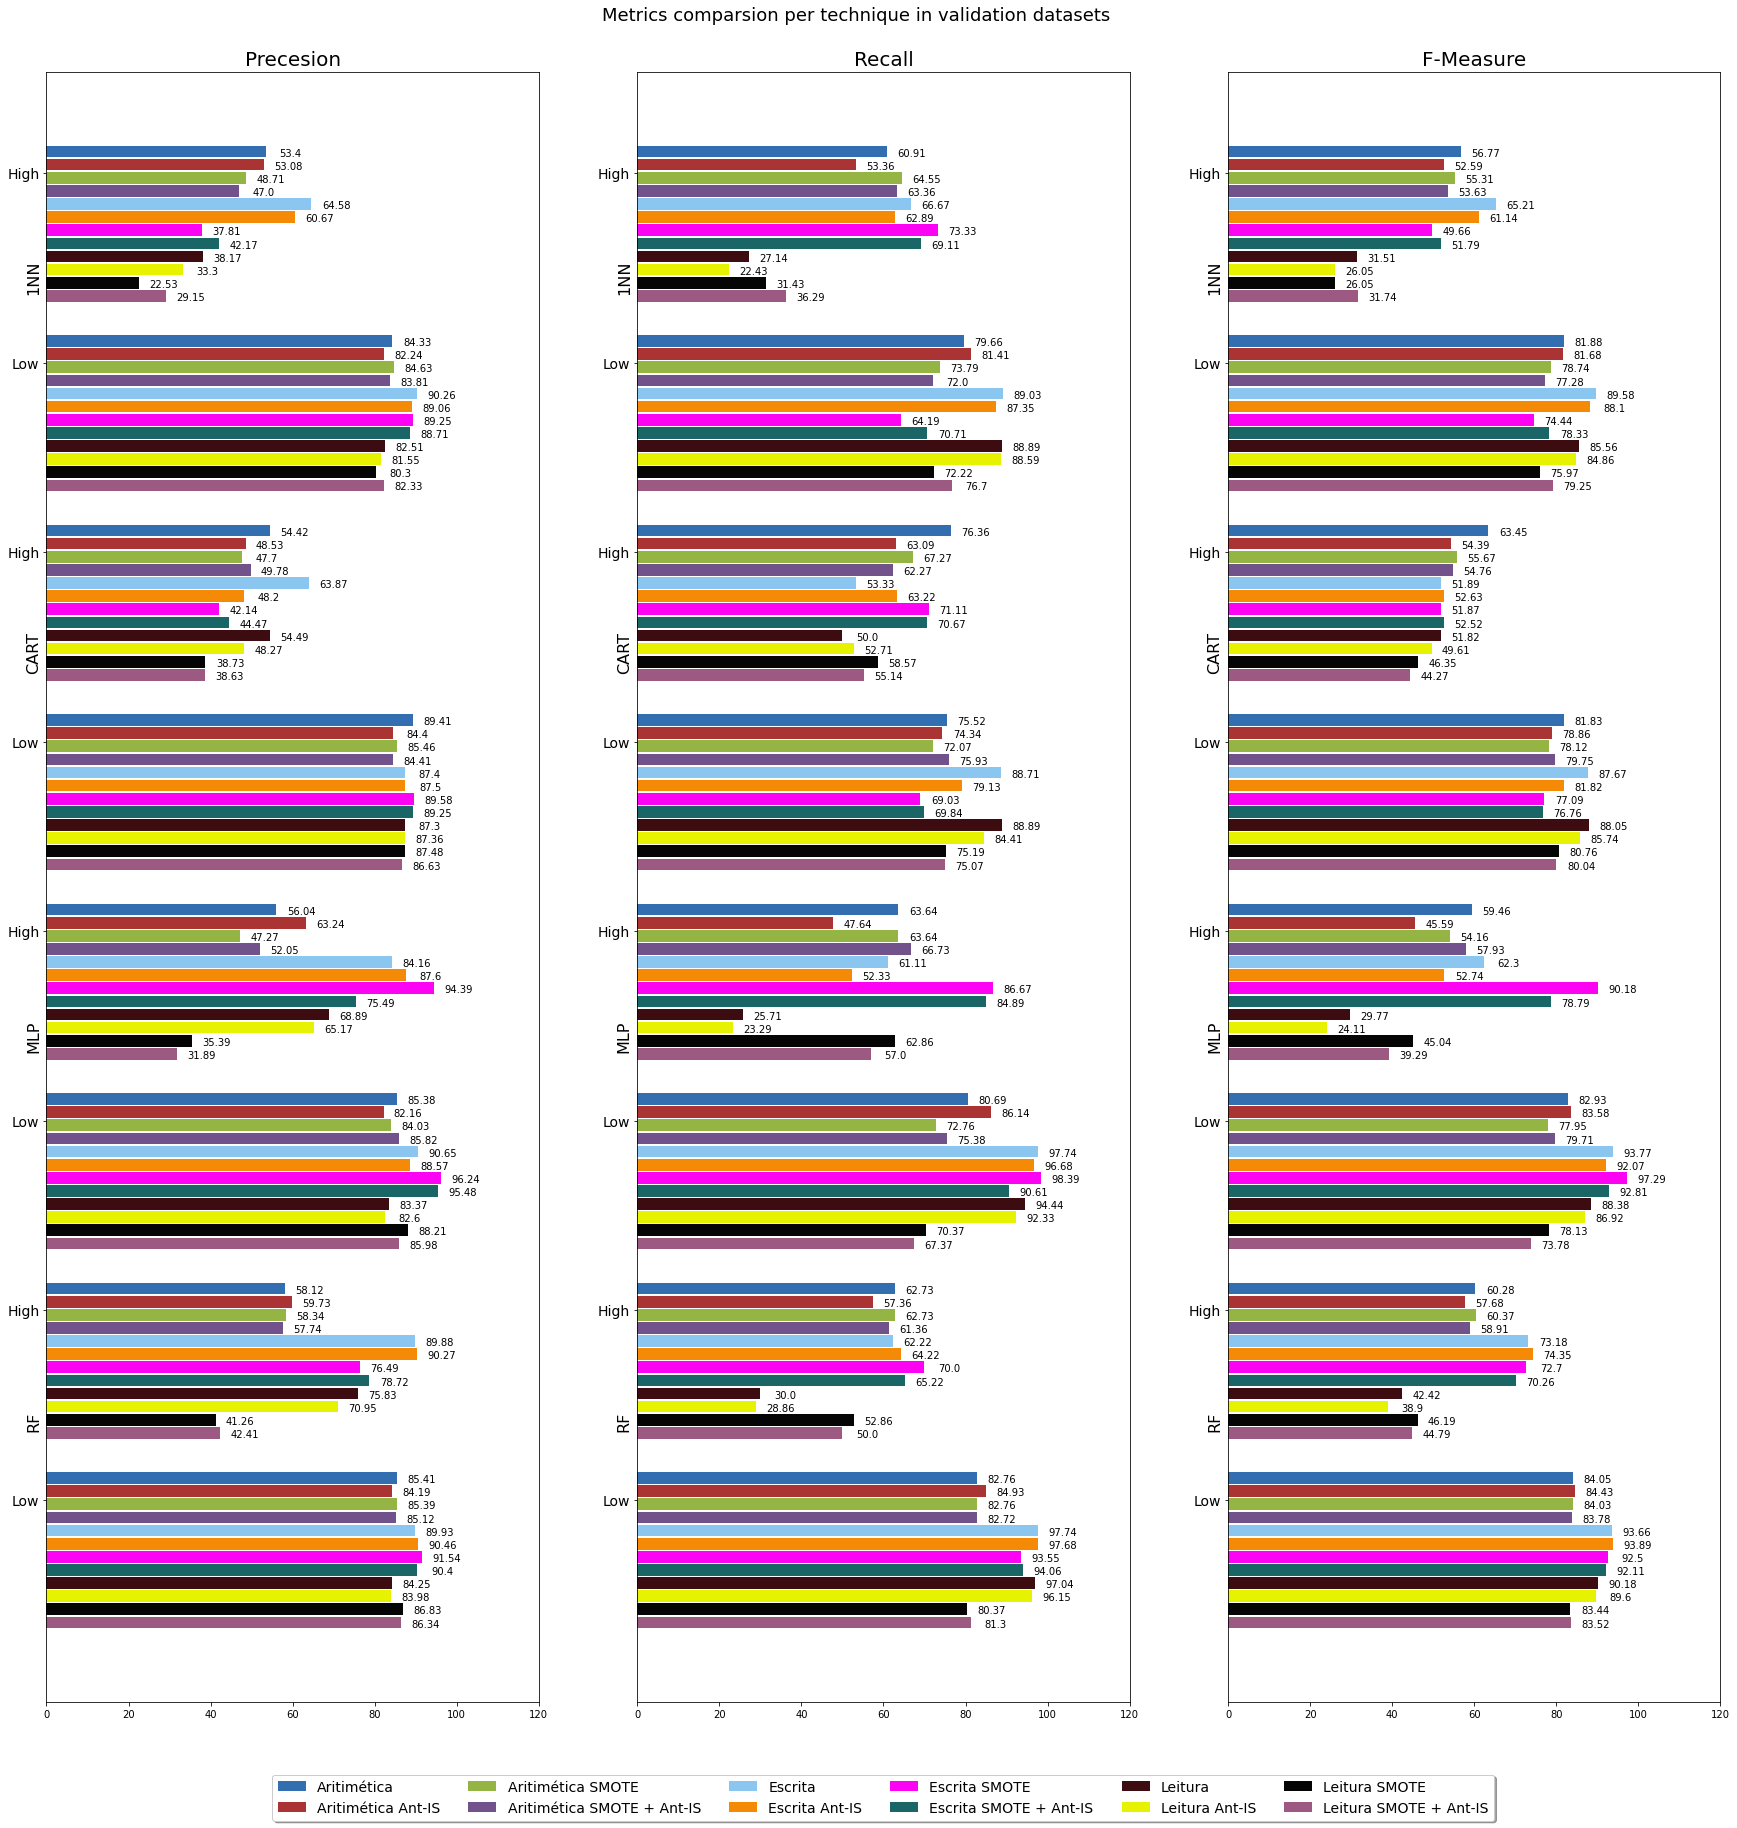

In [17]:
from modules.plots.plot_metrics import plot_metrics

bars_data = [
    [
        bars_arit_precision["full"],
        bars_arit_precision["Ant-IS"],
        bars_arit_precision["SMOTE"],
        bars_arit_precision["Ant-IS+SMOTE"],
        bars_esc_precision["full"],
        bars_esc_precision["Ant-IS"],
        bars_esc_precision["SMOTE"],
        bars_esc_precision["Ant-IS+SMOTE"],
        bars_leit_precision["full"],
        bars_leit_precision["Ant-IS"],
        bars_leit_precision["SMOTE"],
        bars_leit_precision["Ant-IS+SMOTE"],
    ],
    [
        bars_arit_recall["full"],
        bars_arit_recall["Ant-IS"],
        bars_arit_recall["SMOTE"],
        bars_arit_recall["Ant-IS+SMOTE"],
        bars_esc_recall["full"],
        bars_esc_recall["Ant-IS"],
        bars_esc_recall["SMOTE"],
        bars_esc_recall["Ant-IS+SMOTE"],
        bars_leit_recall["full"],
        bars_leit_recall["Ant-IS"],
        bars_leit_recall["SMOTE"],
        bars_leit_recall["Ant-IS+SMOTE"],
    ],
    [
        bars_arit_fmeasure["full"],
        bars_arit_fmeasure["Ant-IS"],
        bars_arit_fmeasure["SMOTE"],
        bars_arit_fmeasure["Ant-IS+SMOTE"],
        bars_esc_fmeasure["full"],
        bars_esc_fmeasure["Ant-IS"],
        bars_esc_fmeasure["SMOTE"],
        bars_esc_fmeasure["Ant-IS+SMOTE"],
        bars_leit_fmeasure["full"],
        bars_leit_fmeasure["Ant-IS"],
        bars_leit_fmeasure["SMOTE"],
        bars_leit_fmeasure["Ant-IS+SMOTE"],
    ]
]



colors = [
    "#336EB0", 
    "#AA3333", 
    "#94B444", 
    "#71528A", 
    "#8AC6EF", 
    "#F58A07", 
    "#fc03f4", 
    "#1a6666", 
    "#3d0c10", 
    "#e6f200", 
    "#050505", 
    "#9c5982"
]
    
bar_labels = [
    "Aritimética",  
    "Aritimética Ant-IS",  
    "Aritimética SMOTE",  
    "Aritimética SMOTE + Ant-IS",  
    "Escrita",  
    "Escrita Ant-IS",  
    "Escrita SMOTE",  
    "Escrita SMOTE + Ant-IS",  
    "Leitura",  
    "Leitura Ant-IS",  
    "Leitura SMOTE",  
    "Leitura SMOTE + Ant-IS"
]


# Aumentando o gráfico
plt.rcParams['figure.figsize'] =  (30, 30)
plt.rcParams['figure.titlesize'] = 'small'


algo_labels = ['1NN', 'CART', 'MLP', 'RF']
metrics_labels = ["Precesion", "Recall", "F-Measure"]
if use_validation_data:
    text_dataset = "validation"
else:
    text_dataset = "test"

# Definindo a largura das barras
barWidth = 0.40

# Espaçamento entre barras
espacamentoEntreBarras = 0.05

# espaçamento de um grupo no outro
espacamentoEntreGrupos = 6.5

algo_fontsize = 16
label_fontsize = 10

label_pad_bar_x = 6.0
label_pad_bar_y = - .23



plot_metrics(
f"Metrics comparsion per technique in {text_dataset} datasets",
bars_data,
bar_labels,
colors,
metrics_labels,
algo_labels,
barWidth,
espacamentoEntreBarras,
espacamentoEntreGrupos,
label_pad_bar_x,
label_pad_bar_y,
algo_fontsize,
label_fontsize)


(<Figure size 2160x2160 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Precesion'}>,
        <AxesSubplot:title={'center':'Recall'}>,
        <AxesSubplot:title={'center':'F-Measure'}>], dtype=object))

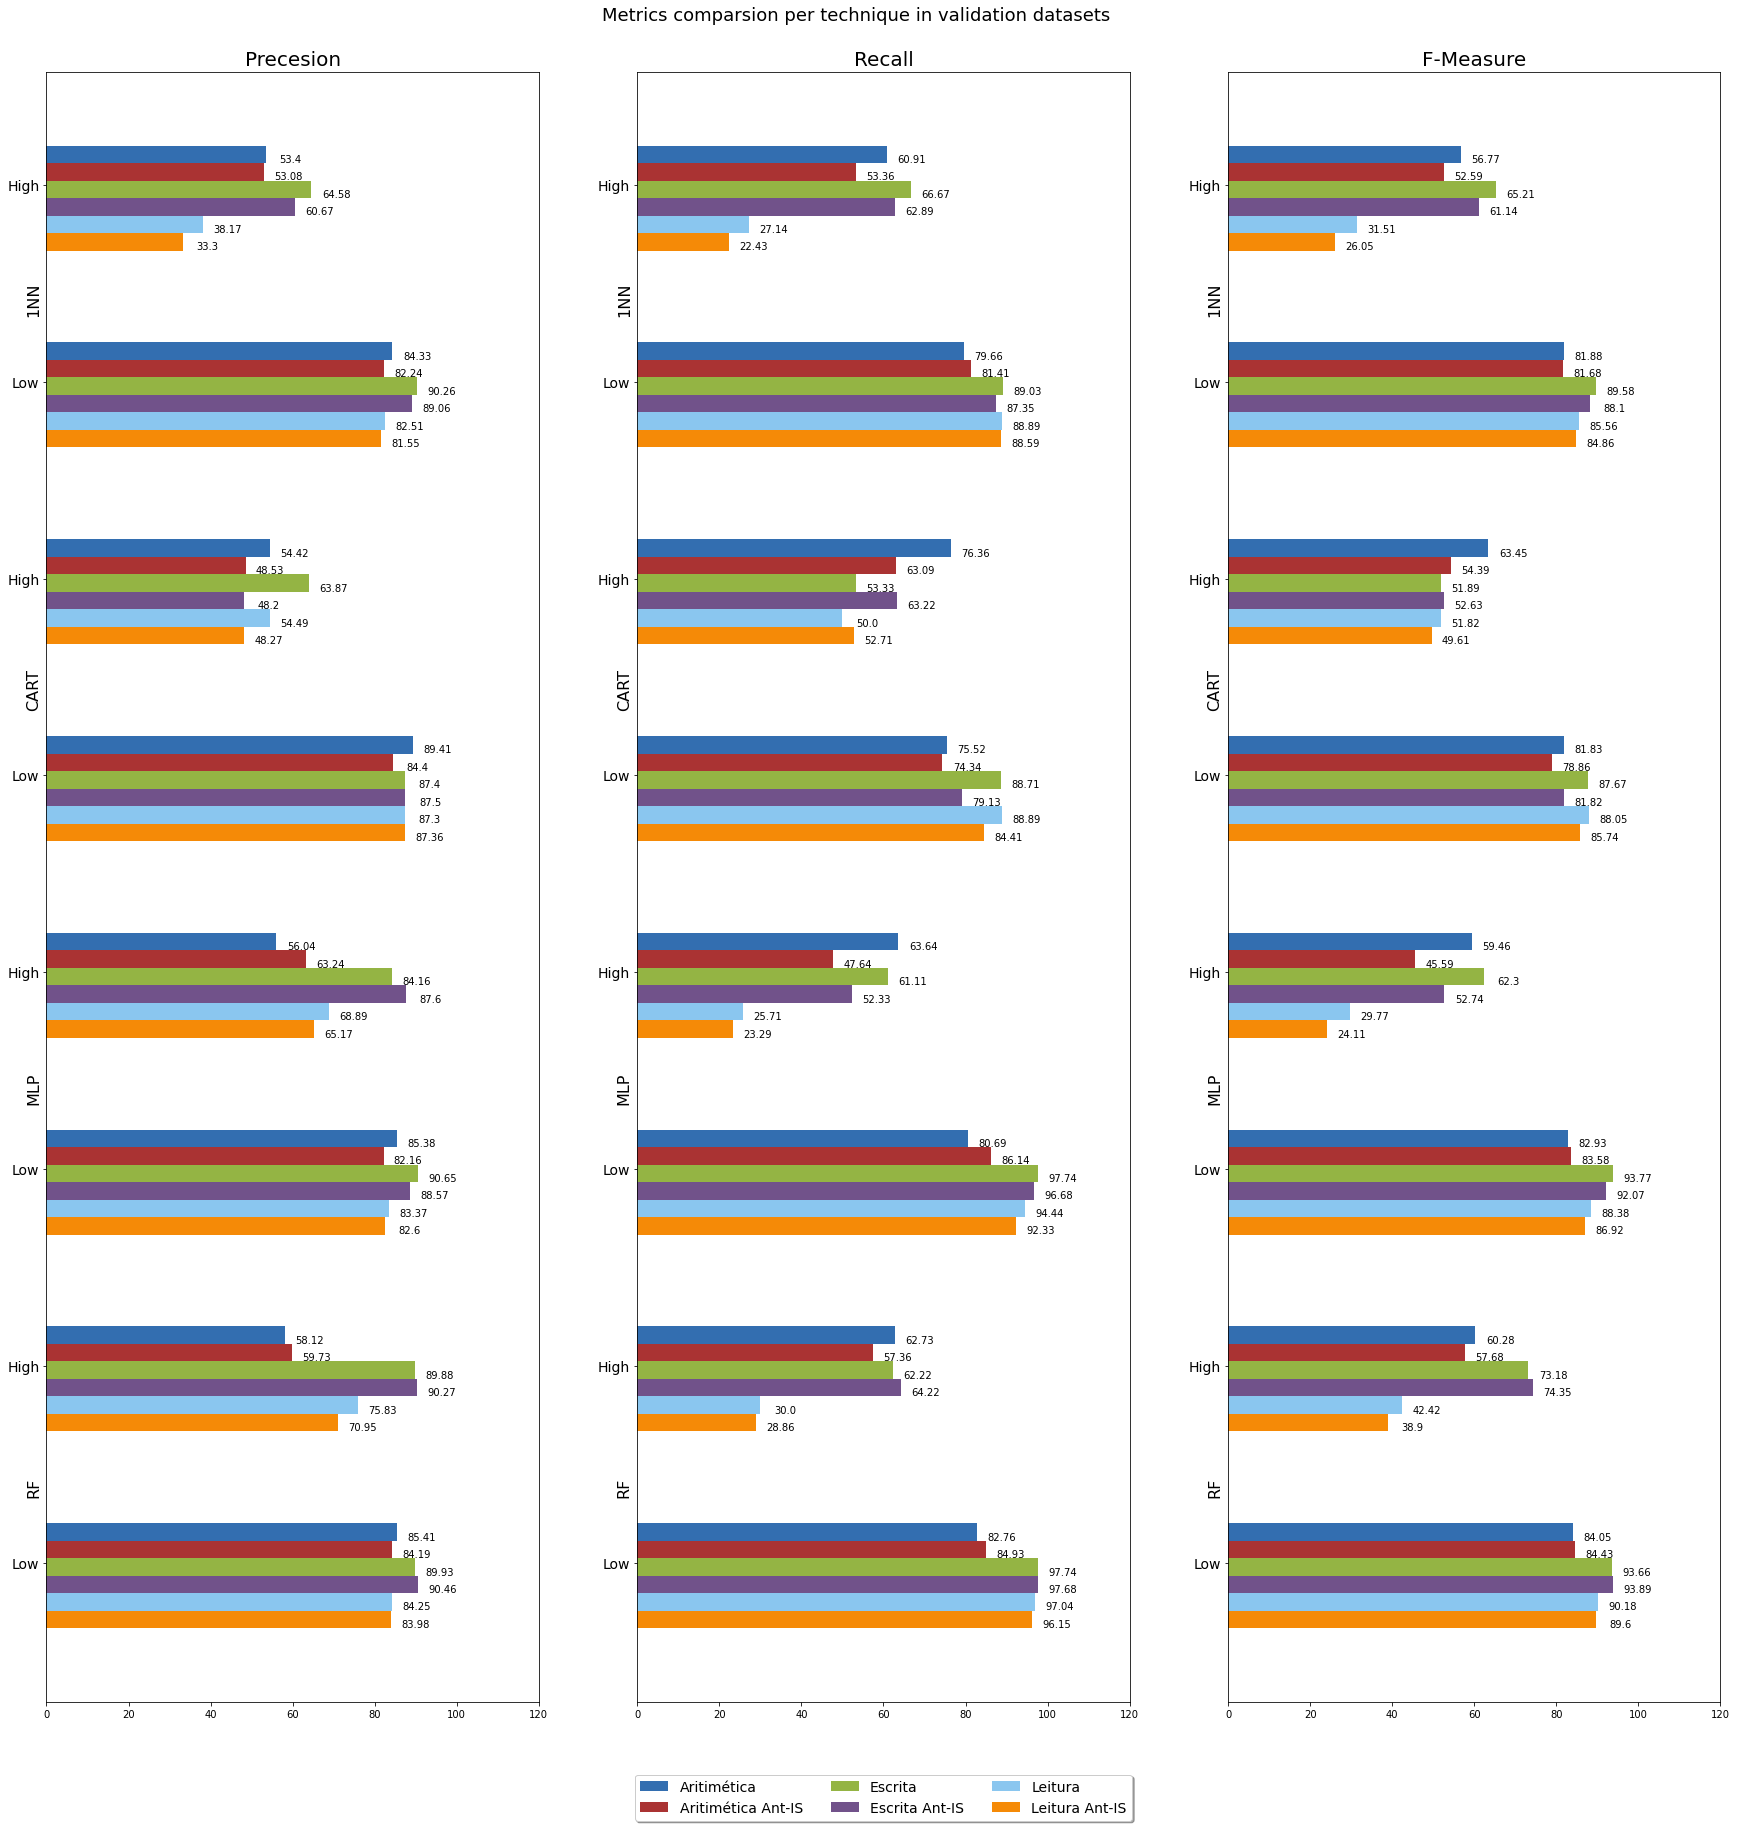

In [18]:
# Plot only ant-is and original dataset

bars_data = [
    [
        bars_arit_precision["full"],
        bars_arit_precision["Ant-IS"],
        bars_esc_precision["full"],
        bars_esc_precision["Ant-IS"],
        bars_leit_precision["full"],
        bars_leit_precision["Ant-IS"],
    ],
    [
        bars_arit_recall["full"],
        bars_arit_recall["Ant-IS"],
        bars_esc_recall["full"],
        bars_esc_recall["Ant-IS"],
        bars_leit_recall["full"],
        bars_leit_recall["Ant-IS"],
    ],
    [
        bars_arit_fmeasure["full"],
        bars_arit_fmeasure["Ant-IS"],
        bars_esc_fmeasure["full"],
        bars_esc_fmeasure["Ant-IS"],
        bars_leit_fmeasure["full"],
        bars_leit_fmeasure["Ant-IS"],
    ]
]



colors = [
    "#336EB0", 
    "#AA3333", 
    "#94B444", 
    "#71528A", 
    "#8AC6EF", 
    "#F58A07", 
]
    
bar_labels = [
    "Aritimética",  
    "Aritimética Ant-IS",  
    "Escrita",  
    "Escrita Ant-IS",  
    "Leitura",  
    "Leitura Ant-IS",  
]


algo_labels = ['1NN', 'CART', 'MLP', 'RF']
metrics_labels = ["Precesion", "Recall", "F-Measure"]
if use_validation_data:
    text_dataset = "validation"
else:
    text_dataset = "test"


# Aumentando o gráfico
plt.rcParams['figure.figsize'] =  (30, 30)
plt.rcParams['figure.titlesize'] = 'small'

# Definindo a largura das barras
barWidth = 0.40

# Espaçamento entre barras
espacamentoEntreBarras = 0.00

# espaçamento de um grupo no outro
espacamentoEntreGrupos = 4.5

algo_fontsize = 16
label_fontsize = 10

label_pad_bar_x = 6.0
label_pad_bar_y = - .23


plot_metrics(
f"Metrics comparsion per technique in {text_dataset} datasets",
bars_data,
bar_labels,
colors,
metrics_labels,
algo_labels,
barWidth,
espacamentoEntreBarras,
espacamentoEntreGrupos,
label_pad_bar_x,
label_pad_bar_y,
algo_fontsize,
label_fontsize)


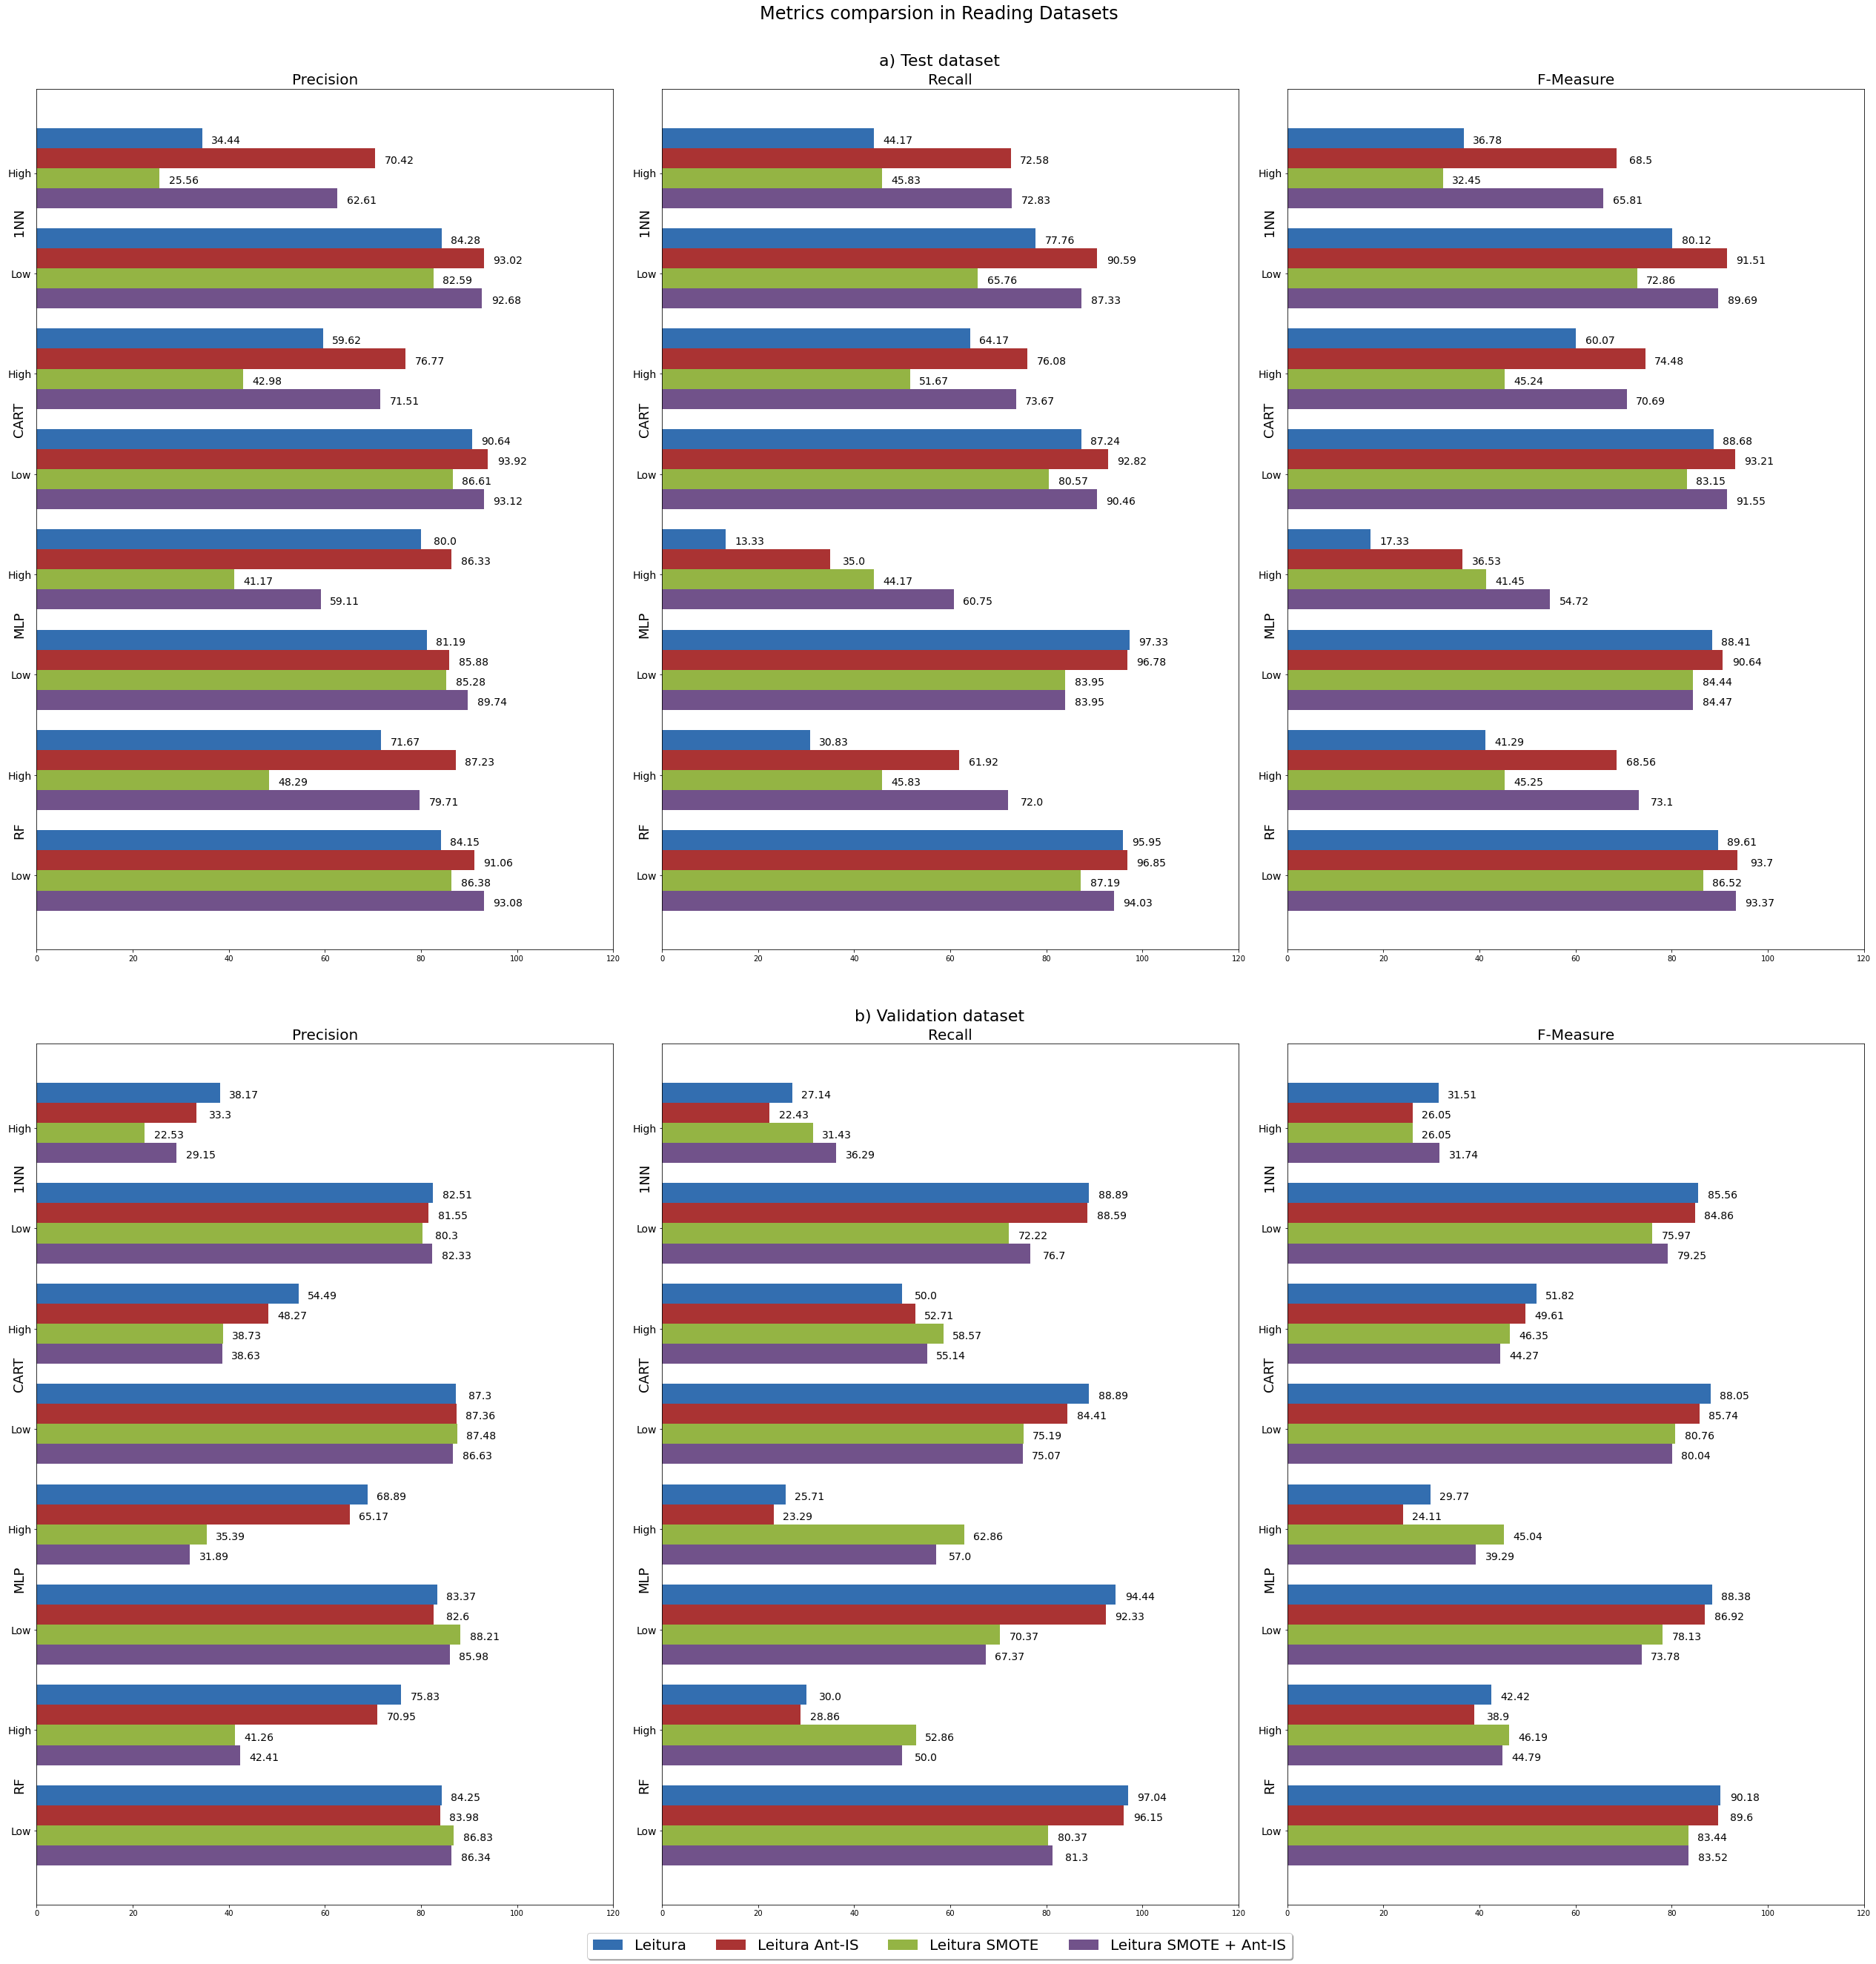

In [19]:
from modules.plots.plot_metrics import plot_metrics

bars_arit_test_recall

test_bars_data = [
    [
        bars_leit_test_precision["full"],
        bars_leit_test_precision["Ant-IS"],
        bars_leit_test_precision["SMOTE"],
        bars_leit_test_precision["Ant-IS+SMOTE"],
    ],
    [
        bars_leit_test_recall["full"],
        bars_leit_test_recall["Ant-IS"],
        bars_leit_test_recall["SMOTE"],
        bars_leit_test_recall["Ant-IS+SMOTE"],
    ],
    [
        bars_leit_test_fmeasure["full"],
        bars_leit_test_fmeasure["Ant-IS"],
        bars_leit_test_fmeasure["SMOTE"],
        bars_leit_test_fmeasure["Ant-IS+SMOTE"],
    ]
]


valid_bars_data = [
    [
        bars_leit_valid_precision["full"],
        bars_leit_valid_precision["Ant-IS"],
        bars_leit_valid_precision["SMOTE"],
        bars_leit_valid_precision["Ant-IS+SMOTE"],
    ],
    [
        bars_leit_valid_recall["full"],
        bars_leit_valid_recall["Ant-IS"],
        bars_leit_valid_recall["SMOTE"],
        bars_leit_valid_recall["Ant-IS+SMOTE"],
    ],
    [
        bars_leit_valid_fmeasure["full"],
        bars_leit_valid_fmeasure["Ant-IS"],
        bars_leit_valid_fmeasure["SMOTE"],
        bars_leit_valid_fmeasure["Ant-IS+SMOTE"],
    ]
]


colors = [
    "#336EB0", 
    "#AA3333", 
    "#94B444", 
    "#71528A", 
]
    
bar_labels = [
    "Leitura",  
    "Leitura Ant-IS",  
    "Leitura SMOTE",  
    "Leitura SMOTE + Ant-IS",  
]

algo_labels = ['1NN', 'CART', 'MLP', 'RF']
metrics_labels = ["Precision", "Recall", "F-Measure"]
if use_validation_data:
    text_dataset = "validation"
else:
    text_dataset = "test"


# Aumentando o gráfico
plt.rcParams['figure.figsize'] = (35, 35)
plt.rcParams['figure.titlesize'] = 'small'


# Definindo a largura das barras
barWidth = 0.40

# Espaçamento entre barras
espacamentoEntreBarras = 0.00

# espaçamento de um grupo no outro
espacamentoEntreGrupos = 2.0

label_pad_bar_x = 5.0
label_pad_bar_y = -0.15

algo_fontsize = 18
label_fontsize = 14

fig = plt.figure(constrained_layout=True)
fig.suptitle('Metrics comparsion in Reading Datasets', fontsize=24, y=1.025)
subfigs = fig.subfigures(2, hspace=0.045)

plot_metrics(
    f"",
    test_bars_data,
    bar_labels,
    colors,
    metrics_labels,
    algo_labels,
    barWidth,
    espacamentoEntreBarras,
    espacamentoEntreGrupos,
    label_pad_bar_x,
    label_pad_bar_y,
    algo_fontsize,
    label_fontsize,
    fig=subfigs[0],
    show_legend=False,
    algo_labels_dis=0.5
)

plot_metrics(
    f"",
    valid_bars_data,
    bar_labels,
    colors,
    metrics_labels,
    algo_labels,
    barWidth,
    espacamentoEntreBarras,
    espacamentoEntreGrupos,
    label_pad_bar_x,
    label_pad_bar_y,
    algo_fontsize,
    label_fontsize,
    fig=subfigs[1],
    show_legend=False,
    algo_labels_dis=0.5
)


# subfigs[0].text(.5, -.025, "Scatter Plot", ha='center', fontsize=20)
# subfigs[1].text(.5, -.025, "Scatter Plot", ha='center', fontsize=20)


subfigs[0].suptitle('a) Test dataset', fontsize=22)
subfigs[1].suptitle('b) Validation dataset', fontsize=22)

fig.legend(bar_labels, loc="lower center", bbox_to_anchor=(0.5, -0.025), fancybox=True, shadow=True, ncol=4, fontsize=20)

(<Figure size 1440x1440 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Precision'}>,
        <AxesSubplot:title={'center':'Recall'}>,
        <AxesSubplot:title={'center':'F-Measure'}>], dtype=object))

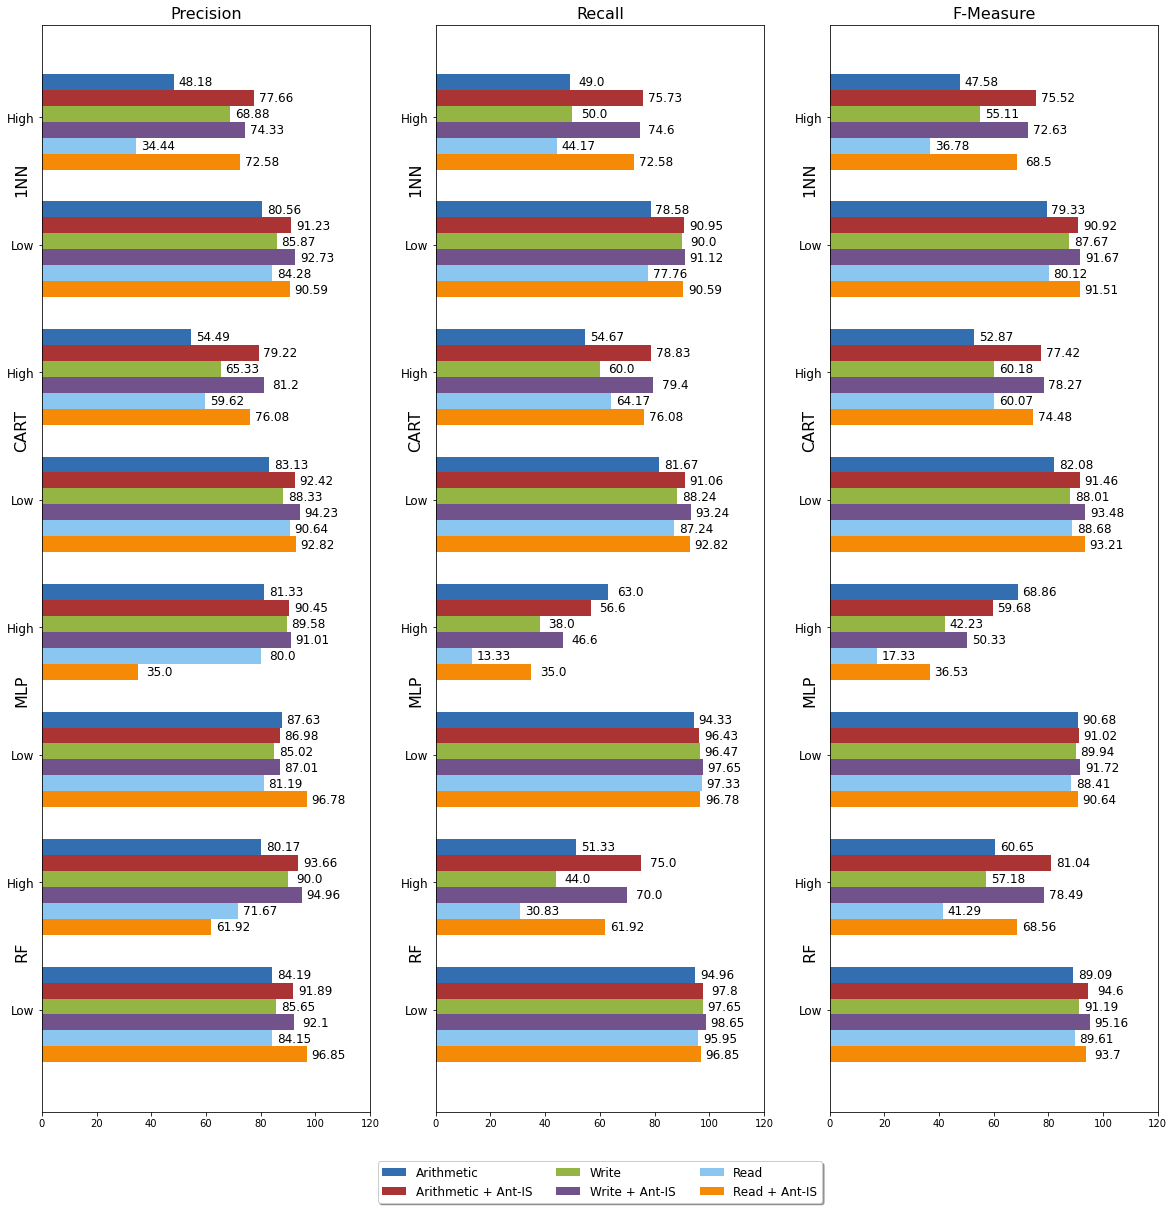

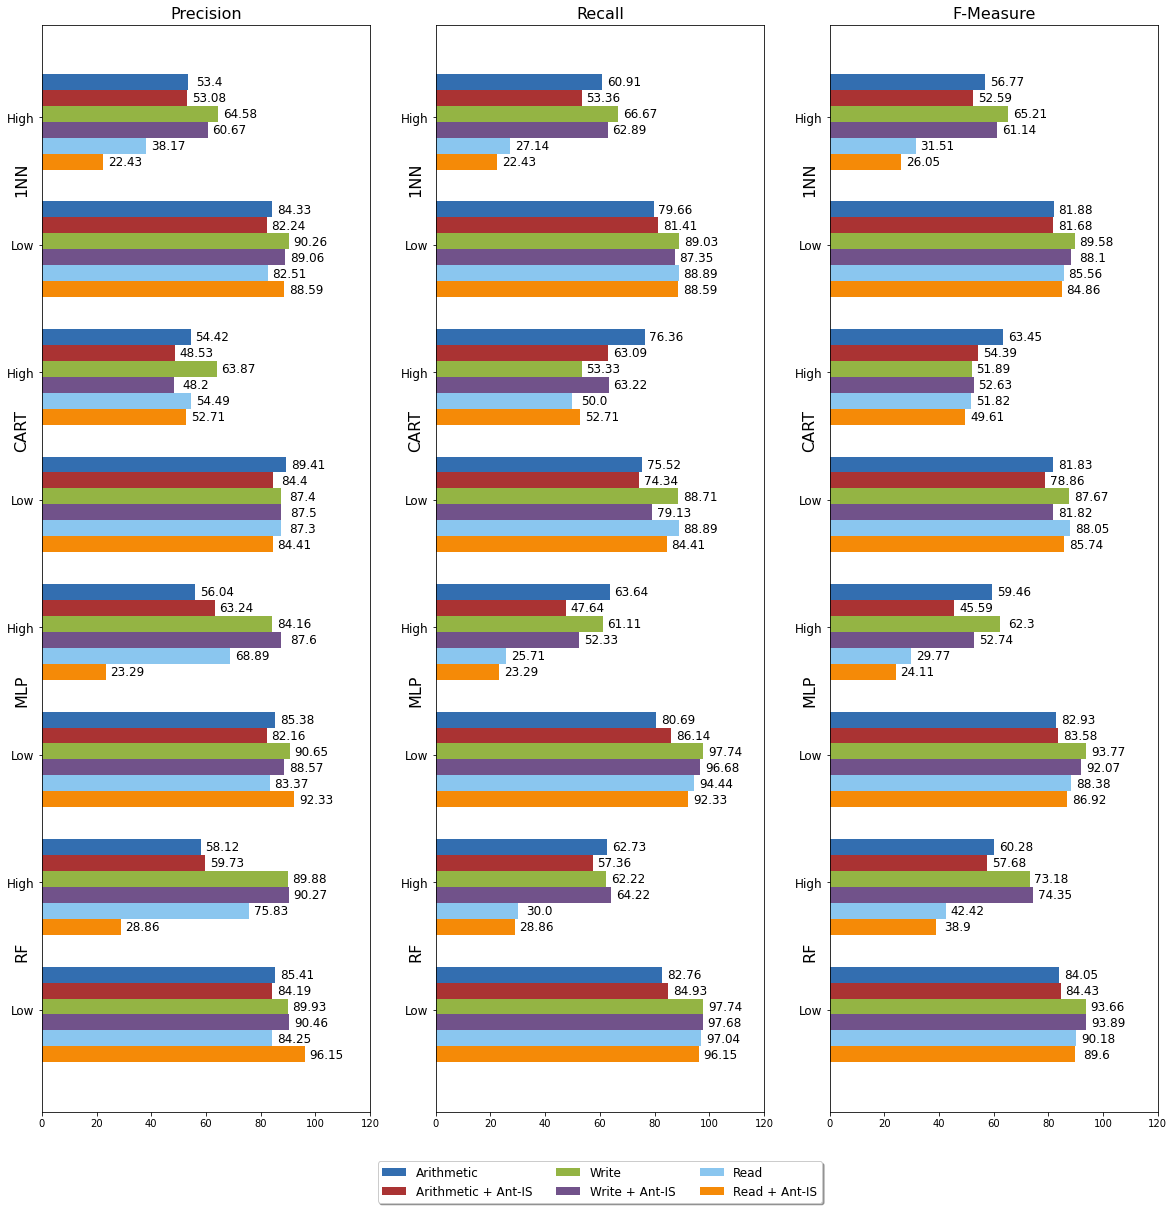

In [20]:
from modules.plots.plot_metrics import plot_metrics

bars_arit_test_recall

test_bars_data = [
    [
        bars_arit_test_precision["full"],
        bars_arit_test_precision["Ant-IS"],
        bars_esc_test_precision["full"],
        bars_esc_test_precision["Ant-IS"],
        bars_leit_test_precision["full"],
        bars_leit_test_recall["Ant-IS"],
    ],
    [
        bars_arit_test_recall["full"],
        bars_arit_test_recall["Ant-IS"],
        bars_esc_test_recall["full"],
        bars_esc_test_recall["Ant-IS"],
        bars_leit_test_recall["full"],
        bars_leit_test_recall["Ant-IS"],
    ],
    [
        bars_arit_test_fmeasure["full"],
        bars_arit_test_fmeasure["Ant-IS"],
        bars_esc_test_fmeasure["full"],
        bars_esc_test_fmeasure["Ant-IS"],
        bars_leit_test_fmeasure["full"],
        bars_leit_test_fmeasure["Ant-IS"],
    ]
]



valid_bars_data = [
    [
        bars_arit_valid_precision["full"],
        bars_arit_valid_precision["Ant-IS"],
        bars_esc_valid_precision["full"],
        bars_esc_valid_precision["Ant-IS"],
        bars_leit_valid_precision["full"],
        bars_leit_valid_recall["Ant-IS"],
    ],
    [
        bars_arit_valid_recall["full"],
        bars_arit_valid_recall["Ant-IS"],
        bars_esc_valid_recall["full"],
        bars_esc_valid_recall["Ant-IS"],
        bars_leit_valid_recall["full"],
        bars_leit_valid_recall["Ant-IS"],
    ],
    [
        bars_arit_valid_fmeasure["full"],
        bars_arit_valid_fmeasure["Ant-IS"],
        bars_esc_valid_fmeasure["full"],
        bars_esc_valid_fmeasure["Ant-IS"],
        bars_leit_valid_fmeasure["full"],
        bars_leit_valid_fmeasure["Ant-IS"],
    ]
]

colors = [
    "#336EB0", 
    "#AA3333", 
    "#94B444", 
    "#71528A", 
    "#8AC6EF", 
    "#F58A07",
]
    
bar_labels = [
    "Arithmetic",  
    "Arithmetic + Ant-IS",  
    "Write",  
    "Write + Ant-IS",
    "Read",  
    "Read + Ant-IS",  
]

algo_labels = ['1NN', 'CART', 'MLP', 'RF']
metrics_labels = ["Precision", "Recall", "F-Measure"]
if use_validation_data:
    text_dataset = "validation"
else:
    text_dataset = "test"


# Aumentando o gráfico
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['figure.titlesize'] = 'small'


# Definindo a largura das barras
barWidth = 0.25

# Espaçamento entre barras
espacamentoEntreBarras = 0.00

# espaçamento de um grupo no outro
espacamentoEntreGrupos = 2.0

label_pad_bar_x = 8.0
label_pad_bar_y = - 0.105

algo_fontsize = 16
label_fontsize = 12

plot_metrics(
    f"",
    test_bars_data,
    bar_labels,
    colors,
    metrics_labels,
    algo_labels,
    barWidth,
    espacamentoEntreBarras,
    espacamentoEntreGrupos,
    label_pad_bar_x,
    label_pad_bar_y,
    algo_fontsize,
    label_fontsize,
    bar_group_font_size=12,
    subaxes_title_fontsize=16,
    legend_fontsize=12,
    show_legend=True,
    algo_labels_x=-10,
    algo_labels_dis=.35,
)

plot_metrics(
    f"",
    valid_bars_data,
    bar_labels,
    colors,
    metrics_labels,
    algo_labels,
    barWidth,
    espacamentoEntreBarras,
    espacamentoEntreGrupos,
    label_pad_bar_x,
    label_pad_bar_y,
    algo_fontsize,
    label_fontsize,
    legend_fontsize=12,
    bar_group_font_size=12,
    subaxes_title_fontsize=16,
    show_legend=True,
    algo_labels_x=-10,
    algo_labels_dis=.35
)